# Erwin Antepuesto
## Instructions:

1. Choose a dataset from https://archive.ics.uci.edu/datasets.
2. Your dataset should be unique to that of your classmate, so be sure to discuss with them, otherwise no points will be given into this assignment.
3. Perform the decision tree similar to the lecture

#### Dataset Info

Name: Heart + Disease<br>
Link: https://archive.ics.uci.edu/dataset/45/heart+disease

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=column_names)


In [2]:
data = data.dropna()

In [3]:
data.replace('?', pd.NA, inplace=True)

data = data.apply(pd.to_numeric, errors='coerce')

data.dropna(inplace=True)

In [4]:
print(data.head())
print(data.info())
print(data.describe())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


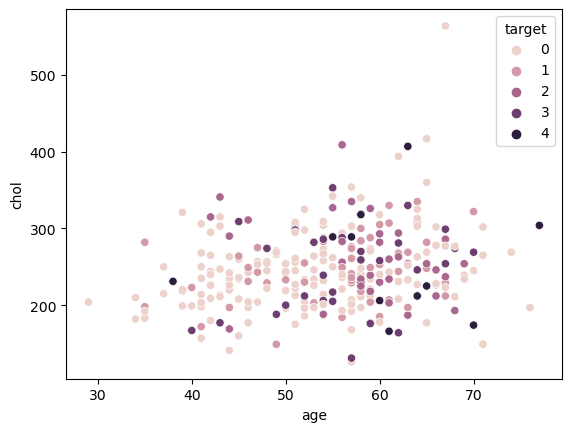

In [6]:
sns.scatterplot(x='age', y='chol', hue='target', data=data)
plt.show()

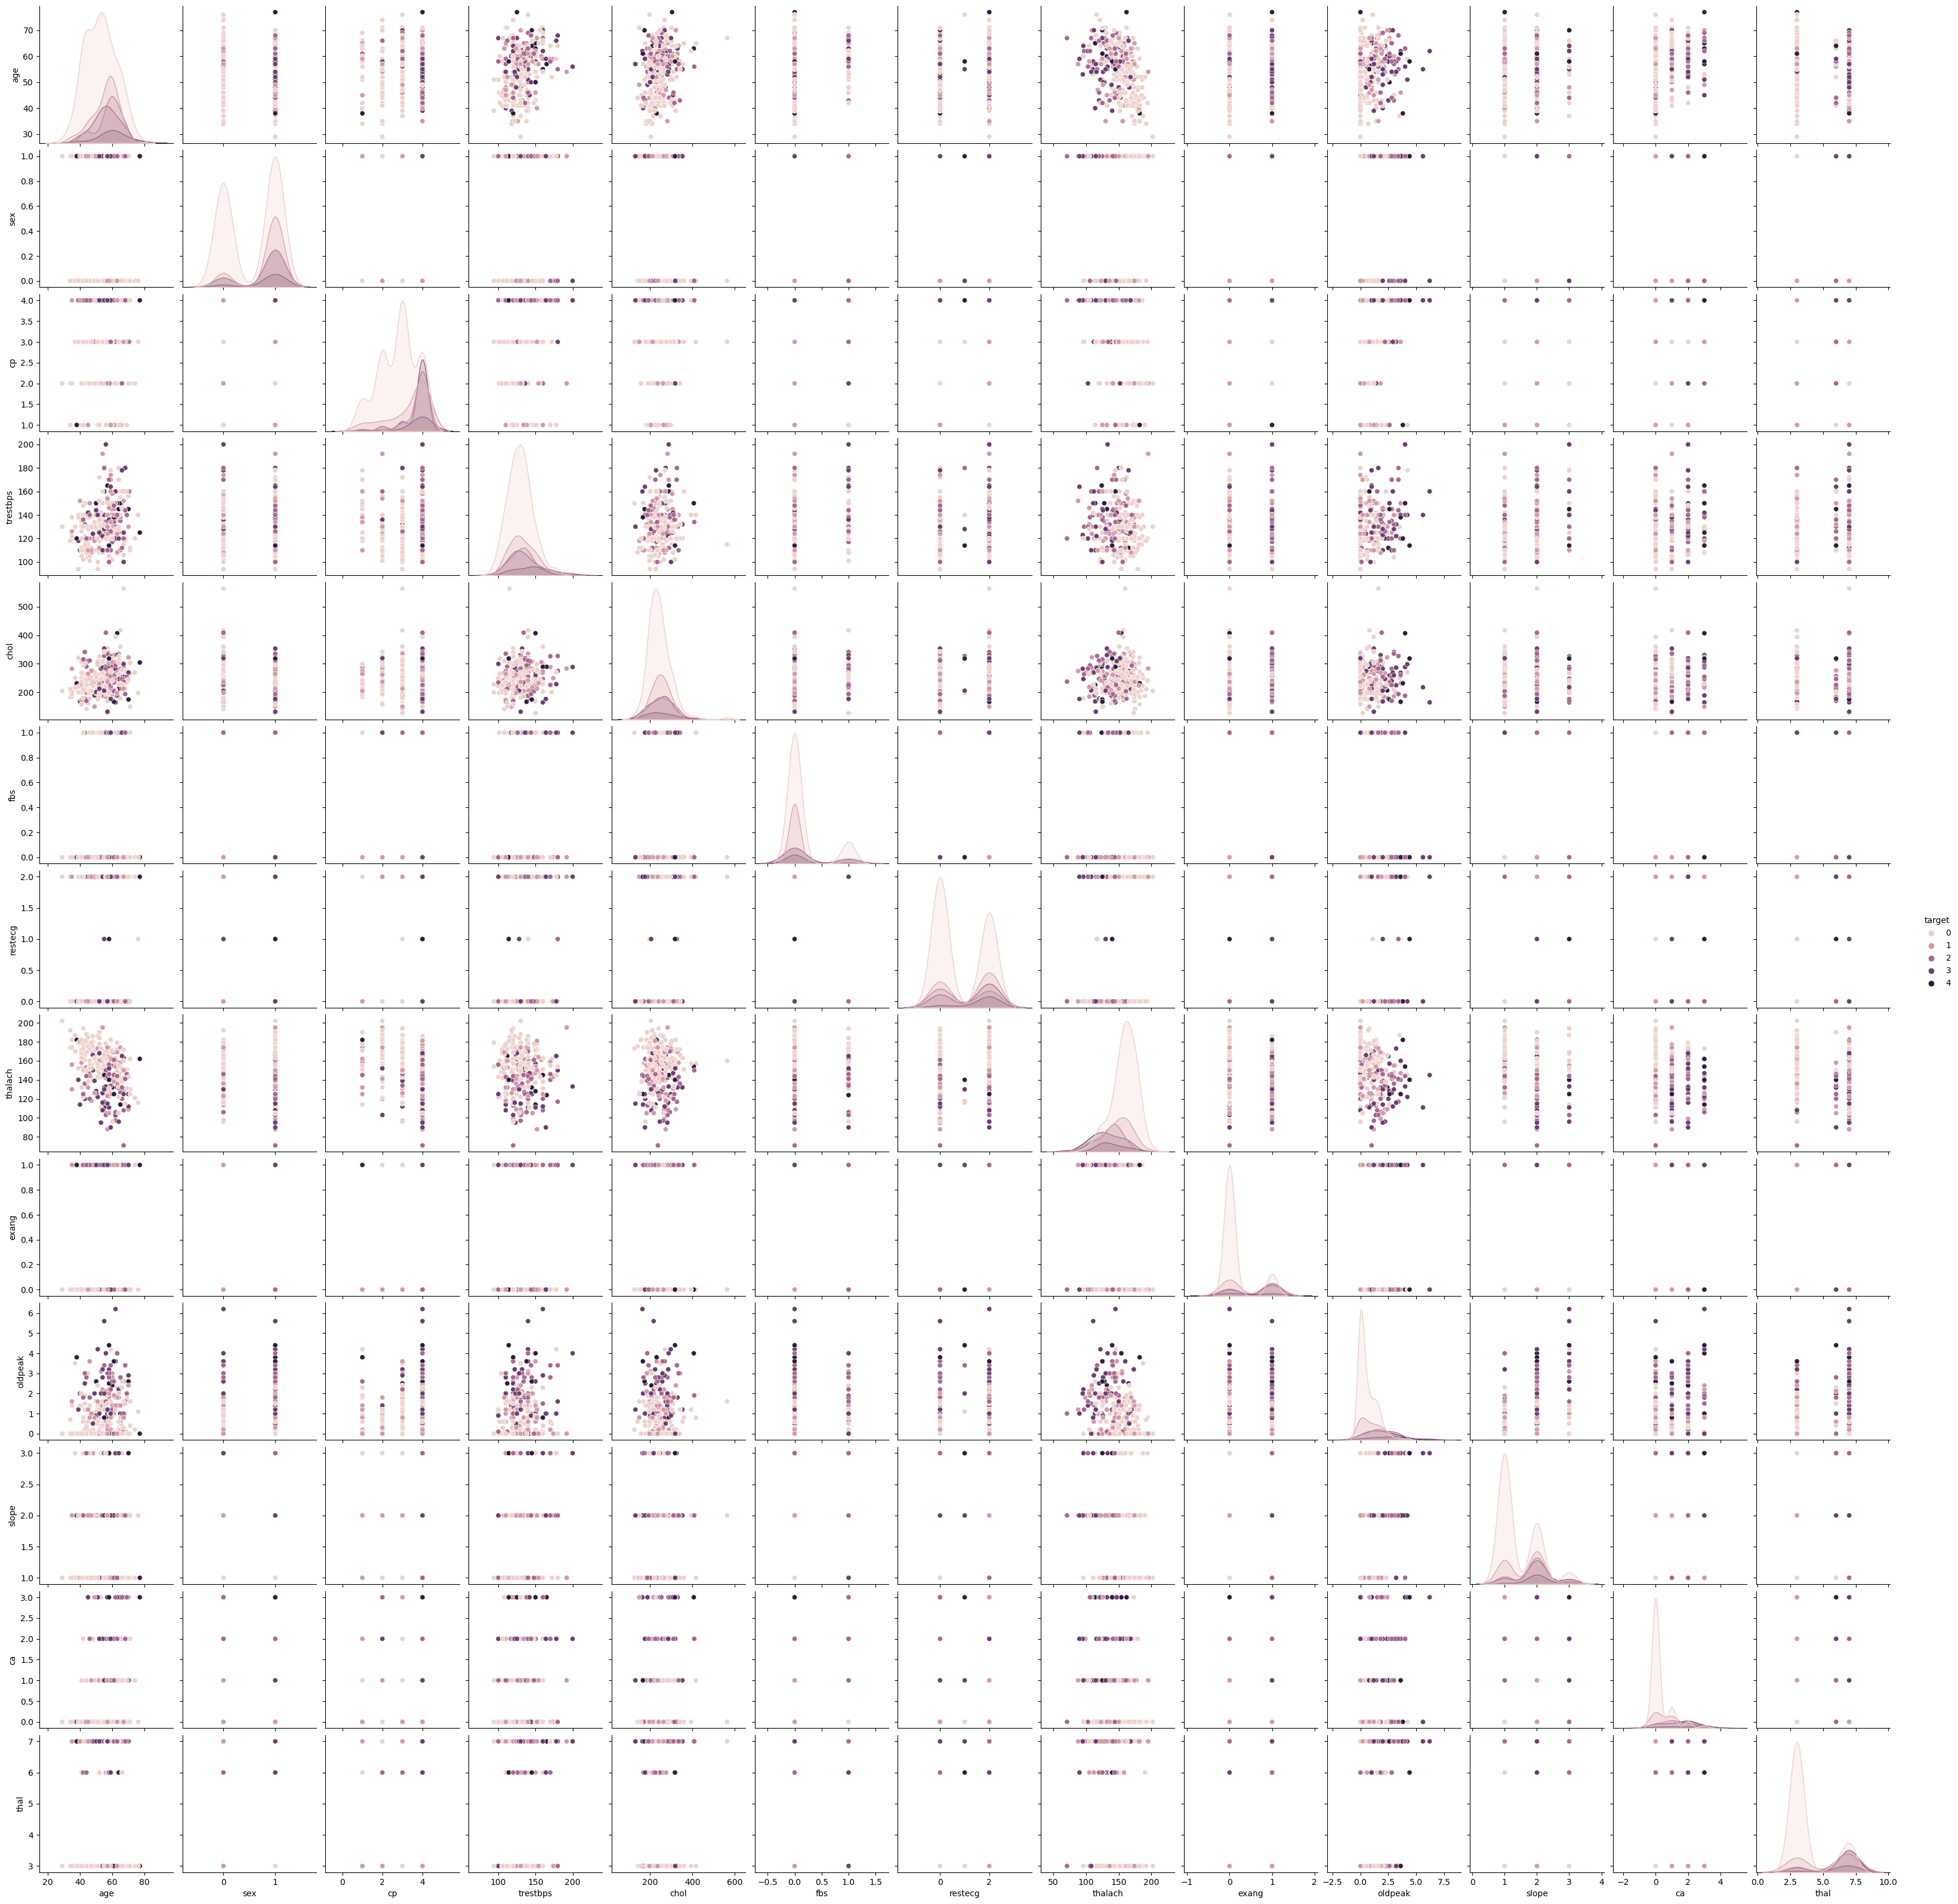

In [7]:
sns.pairplot(data, hue='target')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [10]:
base_pred = clf.predict(X_test)

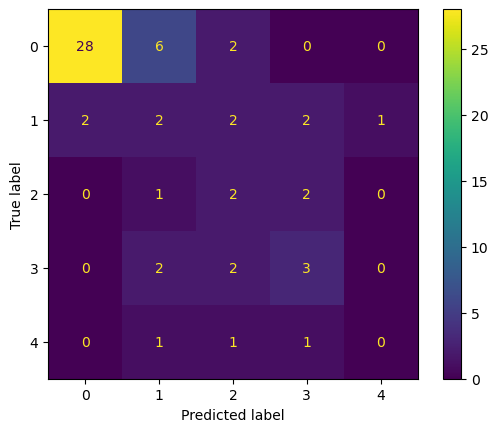

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

cmd.plot()
plt.show()

In [12]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85        36
           1       0.17      0.22      0.19         9
           2       0.22      0.40      0.29         5
           3       0.38      0.43      0.40         7
           4       0.00      0.00      0.00         3

    accuracy                           0.58        60
   macro avg       0.34      0.37      0.34        60
weighted avg       0.65      0.58      0.61        60



In [13]:
clf.feature_importances_

array([0.06841151, 0.01936747, 0.0632211 , 0.09449176, 0.13926664,
       0.01986535, 0.00865104, 0.20309855, 0.03542806, 0.13891564,
       0.00961226, 0.14891541, 0.05075519])

In [14]:
# Feature importances
feature_importances = clf.feature_importances_
feature_importance_df = pd.DataFrame(index=X.columns, data=feature_importances, columns=['Feature Importance'])
feature_importance_df

,Feature Importance
age,0.068412
sex,0.019367
cp,0.063221
trestbps,0.094492
chol,0.139267
fbs,0.019865
restecg,0.008651
thalach,0.203099
exang,0.035428
oldpeak,0.138916


In [15]:
from sklearn.tree import plot_tree

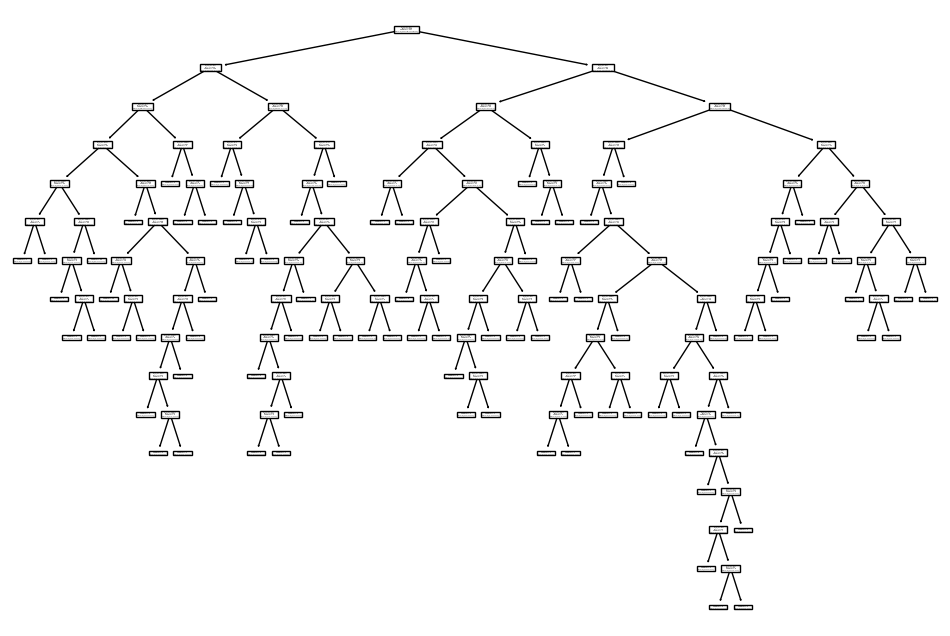

In [16]:
plt.figure(figsize=(12,8))
plot_tree(clf);

[Text(0.42632450331125826, 0.96875, 'ca <= 0.5\ngini = 0.658\nsamples = 237\nvalue = [124, 45, 30, 28, 10]'),
 Text(0.2152317880794702, 0.90625, 'thal <= 6.5\ngini = 0.423\nsamples = 139\nvalue = [103, 21, 6, 7, 2]'),
 Text(0.1423841059602649, 0.84375, 'oldpeak <= 2.7\ngini = 0.251\nsamples = 99\nvalue = [85, 10, 4, 0, 0]'),
 Text(0.09933774834437085, 0.78125, 'age <= 57.5\ngini = 0.196\nsamples = 93\nvalue = [83, 8, 2, 0, 0]'),
 Text(0.052980132450331126, 0.71875, 'thalach <= 125.5\ngini = 0.063\nsamples = 62\nvalue = [60, 1, 1, 0, 0]'),
 Text(0.026490066225165563, 0.65625, 'sex <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1, 0, 0]'),
 Text(0.013245033112582781, 0.59375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0]'),
 Text(0.039735099337748346, 0.59375, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0]'),
 Text(0.07947019867549669, 0.65625, 'trestbps <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1, 0, 0, 0]'),
 Text(0.06622516556291391, 0.59375, 'sex <= 0.5\ngini = 0.375

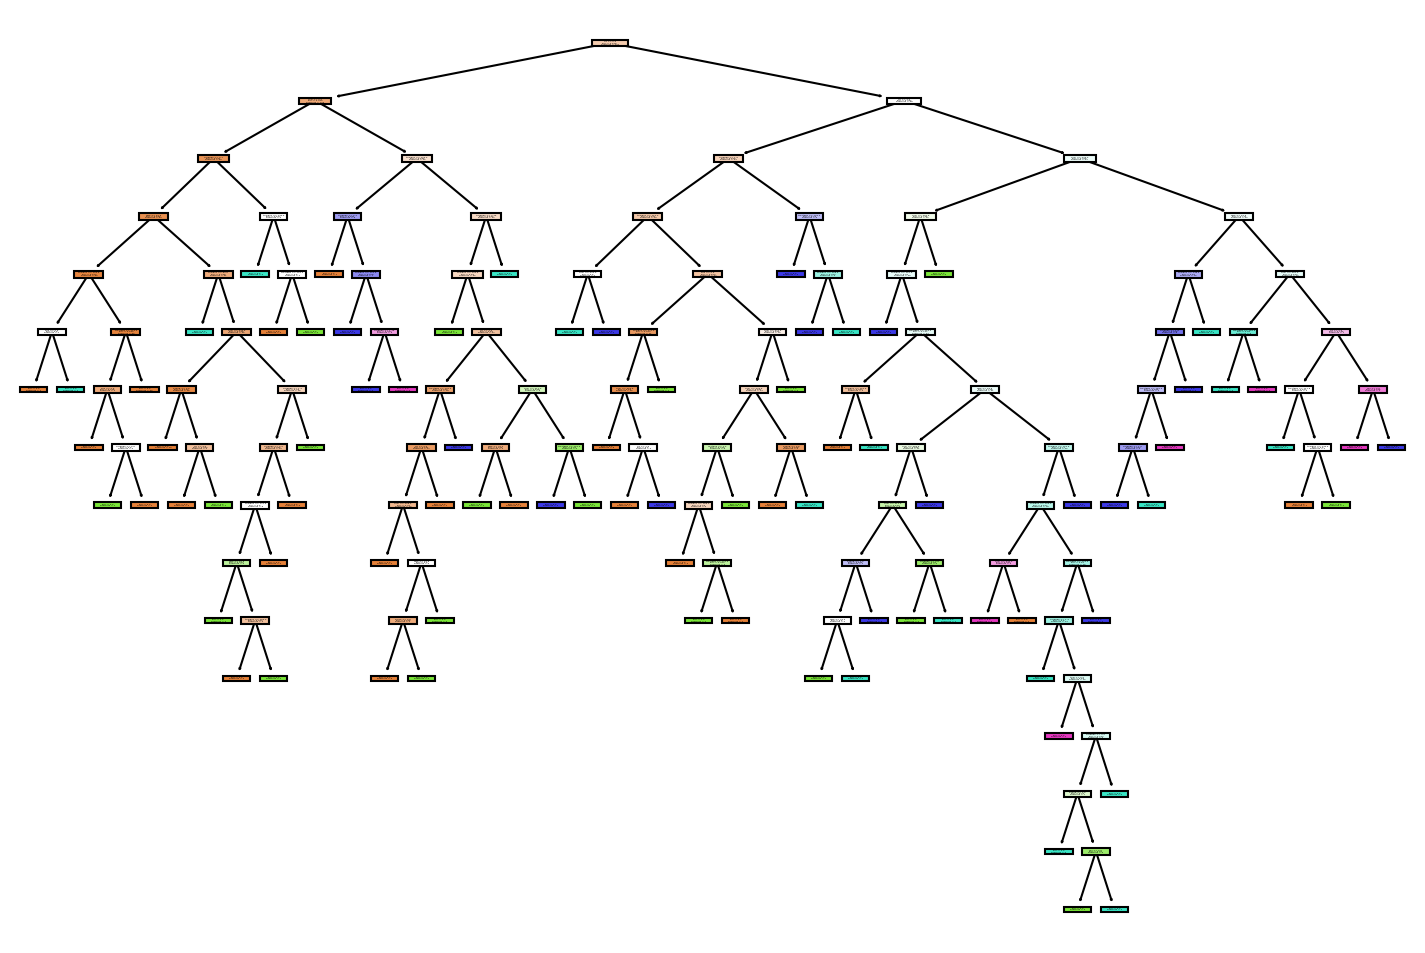

In [17]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(clf, filled=True, feature_names=data.drop('target', axis=1).columns.tolist())

In [25]:
def report_model(model):
    predictions = model.predict(X_test)
    print(classification_report(y_test, predictions))
    plt.figure(figsize=(12,8), dpi=150)
    plot_tree(model, filled=True, feature_names=X.columns.tolist())
    plt.show()


In [19]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

In [20]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.74      0.97      0.84        36
           1       0.00      0.00      0.00         9
           2       0.08      0.20      0.11         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.16      0.23      0.19        60
weighted avg       0.45      0.60      0.52        60



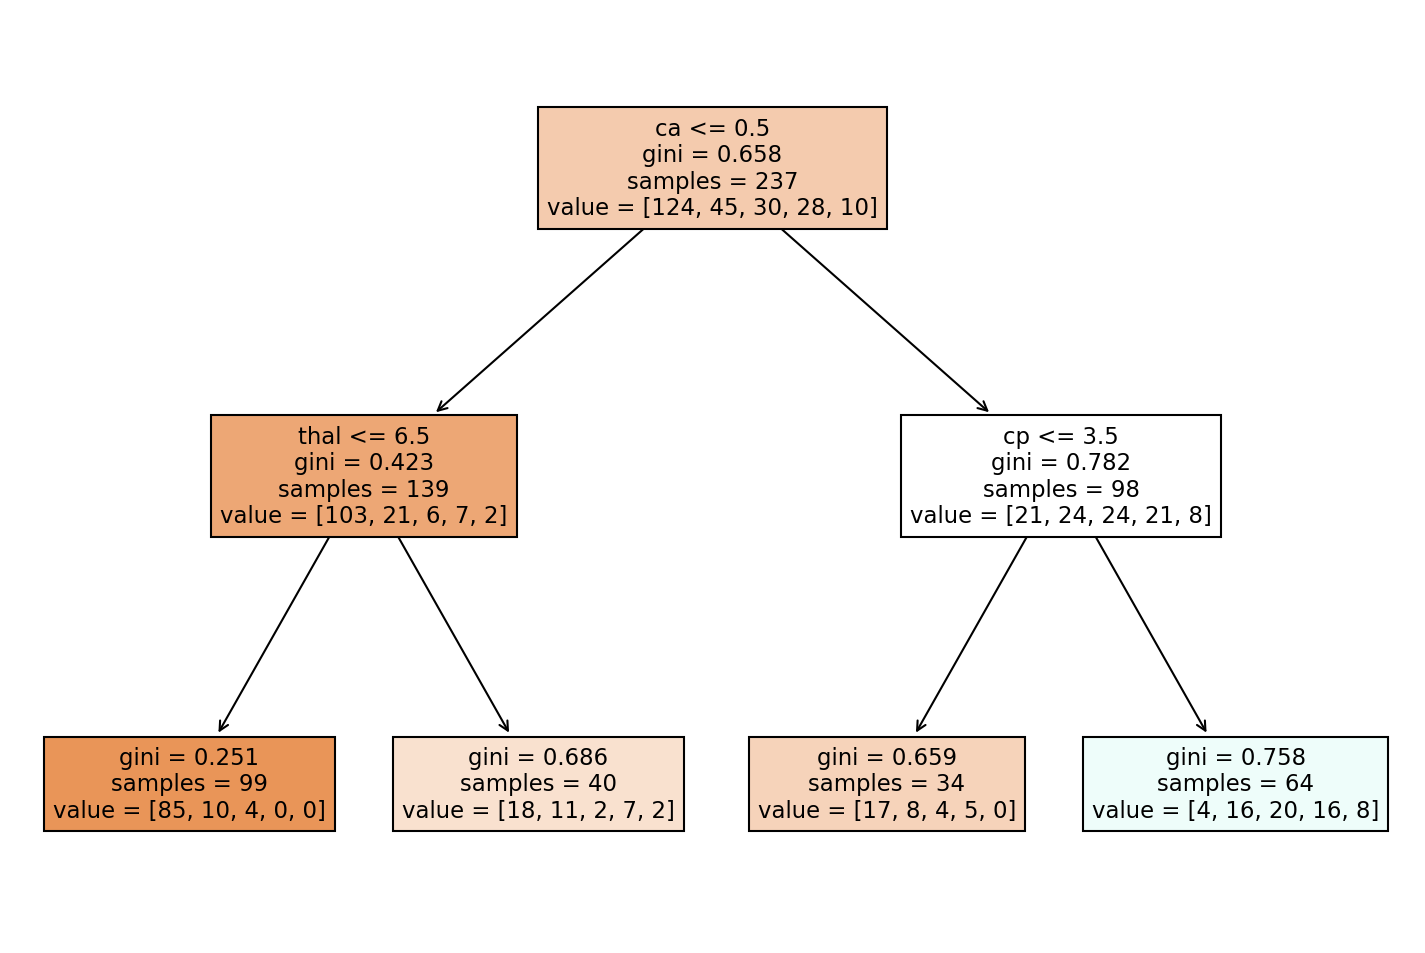

In [26]:
report_model(pruned_tree)

In [27]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.74      0.72      0.73        36
           1       0.16      0.44      0.24         9
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.50        60
   macro avg       0.18      0.23      0.19        60
weighted avg       0.47      0.50      0.47        60



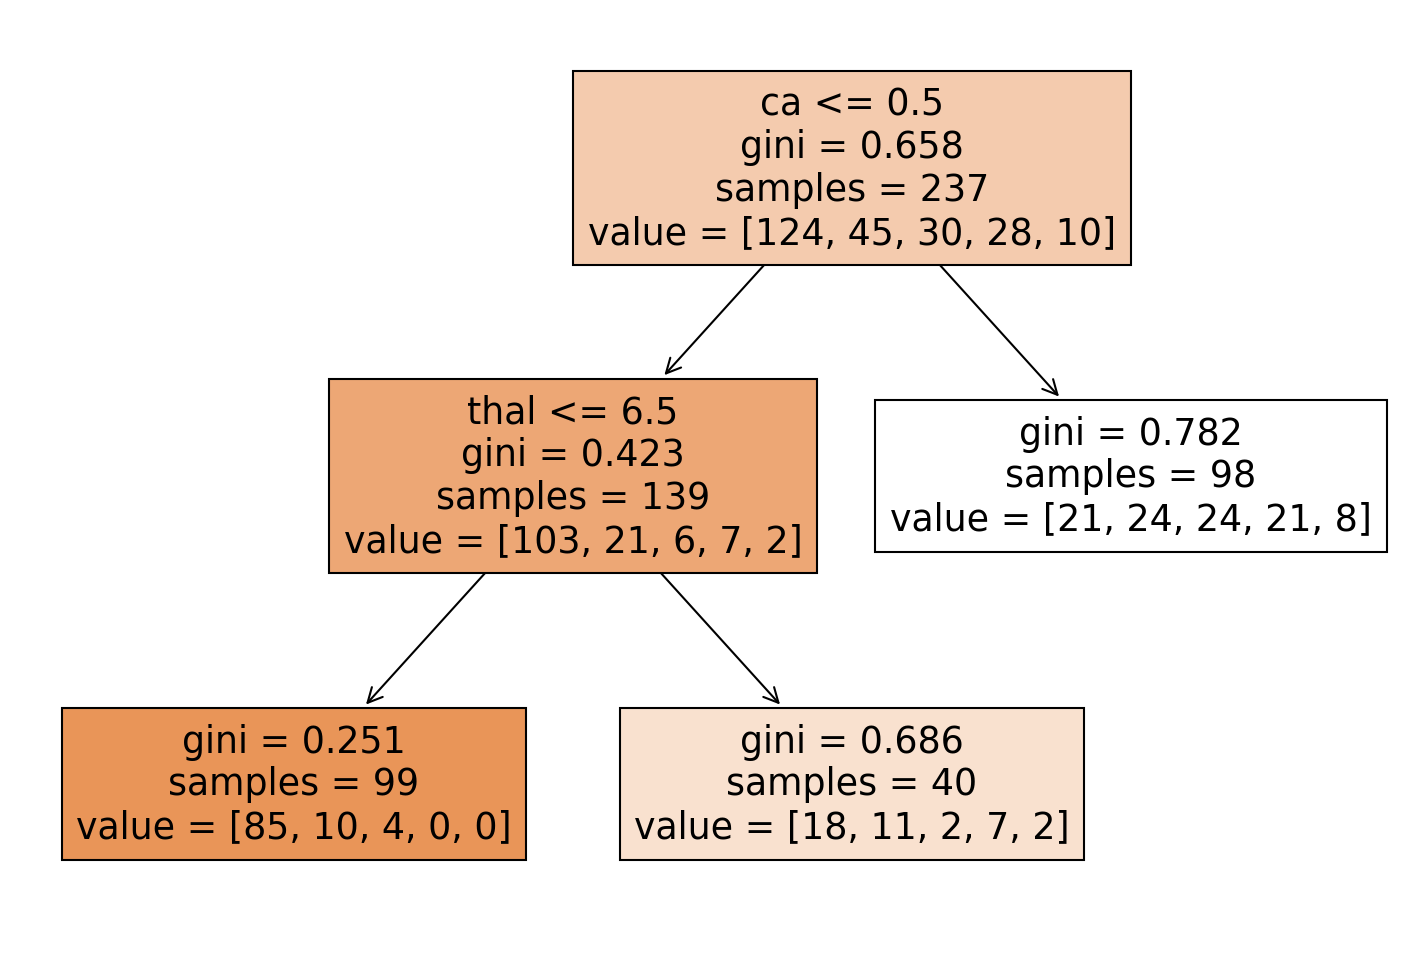

In [28]:
report_model(pruned_tree)

In [29]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        36
           1       0.17      0.22      0.19         9
           2       0.14      0.20      0.17         5
           3       0.25      0.14      0.18         7
           4       0.20      0.33      0.25         3

    accuracy                           0.55        60
   macro avg       0.33      0.34      0.32        60
weighted avg       0.60      0.55      0.57        60



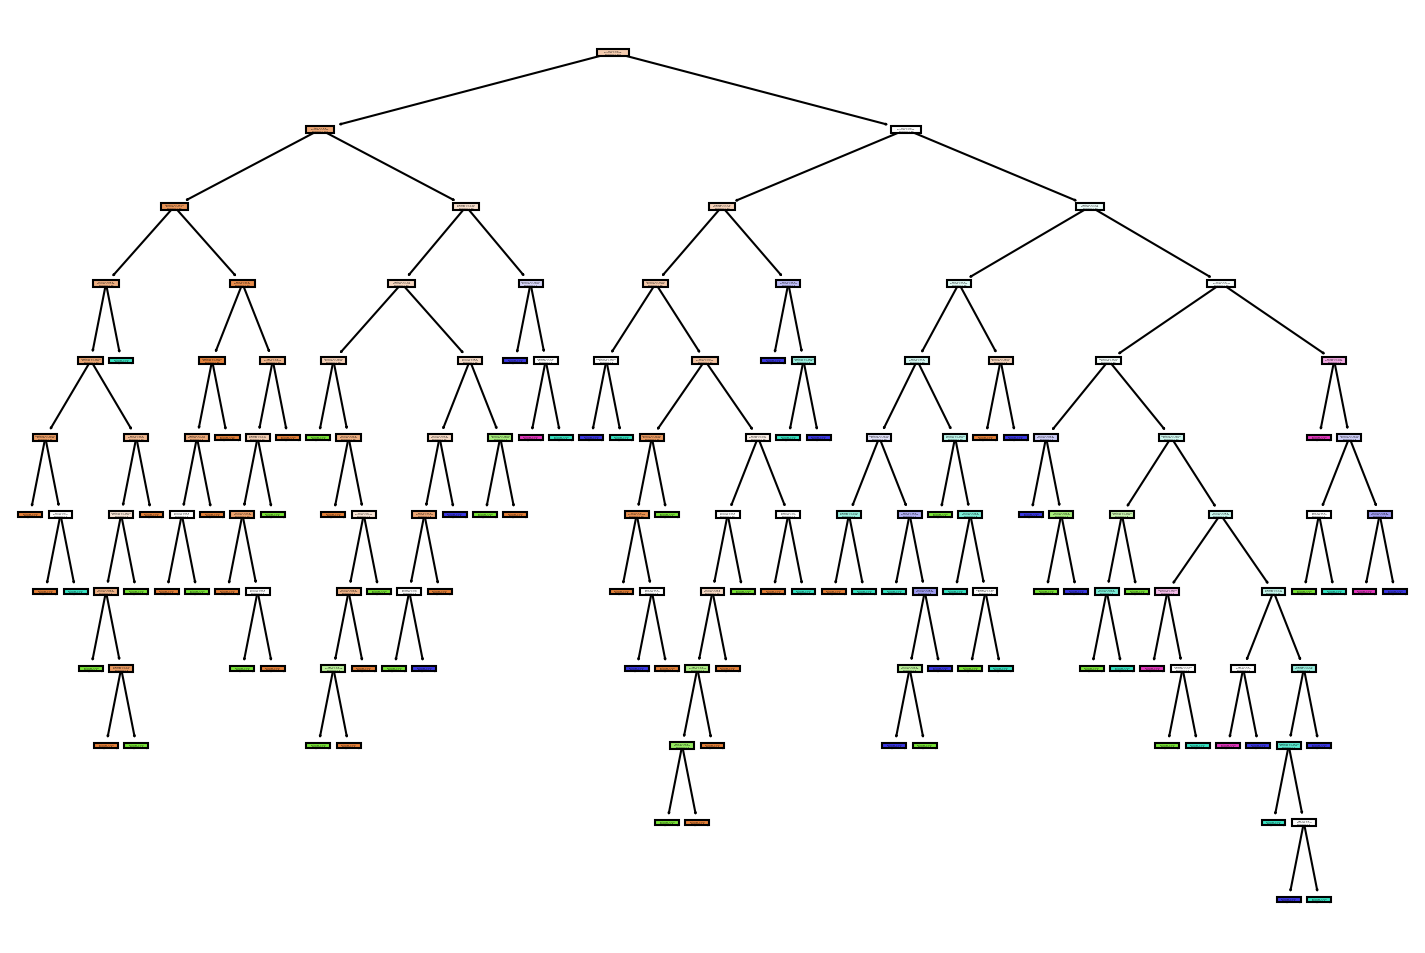

In [30]:
report_model(entropy_tree)